In [34]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

#Load Dataset

In [35]:
# Load dataset
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [36]:
df.shape

(15936, 31)

In [37]:
# Class Distribution 

df.Class.value_counts()

0.0    15862
1.0       73
Name: Class, dtype: int64

In [38]:
# Drop all rows with NaN values

df=df.dropna()
df=df.dropna(axis=0)

In [39]:
# Split into features and target

X = df.drop(['Class'], axis=1)
Y = df.Class

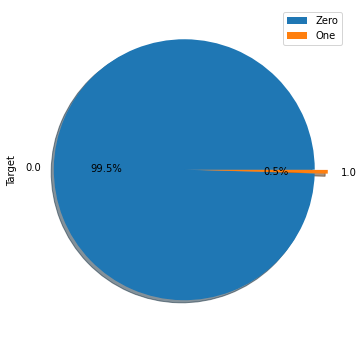

In [40]:
# Show distribution of classes in dataset

count = ""
count = df.Class.value_counts()
count.plot(kind = 'pie', explode = [0, 0.1], 
          figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Target")
plt.legend(["Zero", "One"])
plt.show()

#Before Sampling

<Axes: title={'center': 'Count of Target Classes in Dataset Before Sampling'}>

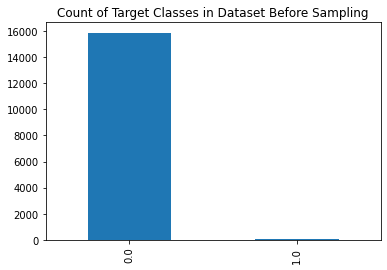

In [41]:
Y.value_counts().plot(kind='bar', title='Count of Target Classes in Dataset Before Sampling')

In [42]:
# summarize class distribution before sampling

print(Counter(Y))

# Check rows and columns of data in DataFrame

print(X.shape)
print()
print(Y.shape)

Counter({0.0: 15862, 1.0: 73})
(15935, 30)

(15935,)


In [43]:
# Split into train and test sets

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define model

M1 = LinearSVC()

M1.fit(X1_train, Y1_train)

Y1_pred = M1.predict(X1_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#After Sampling

In [44]:
# transform the dataset

oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

<Axes: title={'center': 'Count of Target Classes in Dataset After Sampling'}>

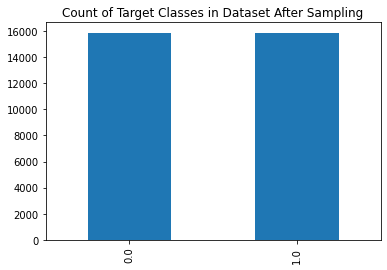

In [45]:
Y.value_counts().plot(kind='bar', title='Count of Target Classes in Dataset After Sampling')

In [46]:
# summarize class distribution after sampling

print(Counter(Y))

# Check rows and columns of data in DataFrame

print(X.shape)
print()
print(Y.shape)

Counter({0.0: 15862, 1.0: 15862})
(31724, 30)

(31724,)


In [47]:
# Split into train and test sets

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define model

M2 = LinearSVC()

M2.fit(X2_train, Y2_train)

Y2_pred = M2.predict(X2_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#Result

Before oversampling, the model may have a higher F1 score on the majority class, due to its higher number of samples. However, the F1 score on the minority class may be low, indicating that the model is not performing well on detecting the minority class instances.

After oversampling, the model is exposed to more minority class instances and learns to better classify them. This leads to an improvement in recall on the minority class and hence an improvement in the F1 score. The improvement in F1 score can be a useful measure to determine the effectiveness of the oversampling method in improving the model's performance on the minority class.

EVALUATION OF MODEL PERFORMANCE BEFORE OVERSAMPLING
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3167
         1.0       0.64      0.80      0.71        20

    accuracy                           1.00      3187
   macro avg       0.82      0.90      0.85      3187
weighted avg       1.00      1.00      1.00      3187



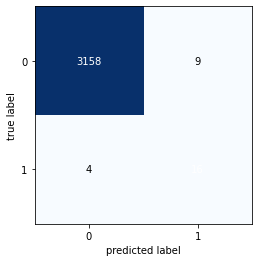

EVALUATION OF MODEL PERFORMANCE AFTER OVERSAMPLING
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      3219
         1.0       0.98      0.93      0.96      3126

    accuracy                           0.96      6345
   macro avg       0.96      0.96      0.96      6345
weighted avg       0.96      0.96      0.96      6345



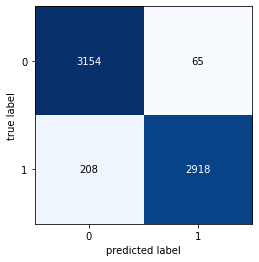

In [48]:
print("EVALUATION OF MODEL PERFORMANCE BEFORE OVERSAMPLING")

# Evaluate the model on the test data

print(classification_report(Y1_test, Y1_pred))
cm1 = confusion_matrix(Y1_test, Y1_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm1)
plt.show()

print("EVALUATION OF MODEL PERFORMANCE AFTER OVERSAMPLING")

# Evaluate the model on the test data

print(classification_report(Y2_test, Y2_pred))
cm2 = confusion_matrix(Y2_test, Y2_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm2)
plt.show()